In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#import data
price_data = pd.read_csv('Input Data/Day Data/day_data_csv.csv')
price_data.dtypes

date                         int64
ema(4)                     float64
ema(10)                    float64
macd                       float64
macd 1st d                 float64
high low span              float64
high above ema             float64
close above ema            float64
close relative to high     float64
volume change              float64
volume relative to span    float64
to buy                       int64
dtype: object

In [2]:
#split into x and y 
X = price_data.drop("to buy", axis=1)
y = price_data["to buy"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\jhills\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jhills\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\jhills\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


k: 1, Train/Test Score: 0.670/0.094
k: 11, Train/Test Score: 0.992/0.160
k: 21, Train/Test Score: 0.999/0.166
k: 31, Train/Test Score: 1.000/0.177
k: 41, Train/Test Score: 1.000/0.183
k: 51, Train/Test Score: 1.000/0.185
k: 61, Train/Test Score: 1.000/0.191
k: 71, Train/Test Score: 1.000/0.185
k: 81, Train/Test Score: 1.000/0.194
k: 91, Train/Test Score: 1.000/0.188


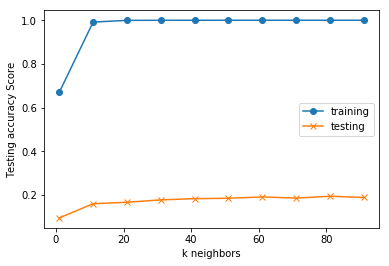

In [97]:
from sklearn.ensemble import RandomForestClassifier
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 100, 10):
    knn = RandomForestClassifier(n_estimators=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 10), train_scores, marker='o', label='training')
plt.plot(range(1, 100, 10), test_scores, marker="x", label='testing')
plt.legend()
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [246]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes = 24, max_depth=5,max_features=8)
dtc = dtc.fit(X_train_scaled, y_train)

training_accur = dtc.score(X_train_scaled, y_train)
testing_accur = dtc.score(X_test_scaled, y_test) 

print(f"Training Accuracy Score: {training_accur}")
print(f"Testing Accuracy Score: {testing_accur}")


Training Accuracy Score: 0.6973540856031128
Testing Accuracy Score: 0.6731517509727627


In [247]:
importances = dtc.feature_importances_
feature_names = ['ema (4)','ema(10)','macd','macd 1st d','high low span','high above ema','close above ema','close relative to high','volume change','volume relative to span']

sorted(zip(dtc.feature_importances_, feature_names), reverse=True)

[(0.7006457143080235, 'high above ema'),
 (0.15046395550263095, 'ema (4)'),
 (0.055820414867644365, 'volume relative to span'),
 (0.0347794553804832, 'close relative to high'),
 (0.026074641155021228, 'volume change'),
 (0.02072260448852098, 'macd 1st d'),
 (0.0, 'macd'),
 (0.0, 'high low span'),
 (0.0, 'ema(10)'),
 (0.0, 'close above ema')]

In [248]:
# Use our model to make predictions and generate confusion matrix
y_train_predict = dtc.predict(X_train_scaled)
y_test_predict = dtc.predict(X_test_scaled)

#price_data["Prediction"]=predict_all
#price_data.to_csv('predicted_price_data.csv')

from sklearn.metrics import confusion_matrix, classification_report

test_cm = pd.DataFrame(confusion_matrix(y_test, y_test_predict))
train_cm = pd.DataFrame(confusion_matrix(y_train, y_train_predict))
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
print(test_cm.head(50))
print(train_cm.head(50))

test_cr = classification_report(y_test, y_test_predict)
train_cr = classification_report(y_train, y_train_predict)
print(test_cr)
print(train_cr)

      0     1
0  4107  1976
1   124   218
      0     1
0  8456  3742
1   147   505
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      6083
           1       0.10      0.64      0.17       342

   micro avg       0.67      0.67      0.67      6425
   macro avg       0.54      0.66      0.48      6425
weighted avg       0.92      0.67      0.76      6425

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     12198
           1       0.12      0.77      0.21       652

   micro avg       0.70      0.70      0.70     12850
   macro avg       0.55      0.73      0.51     12850
weighted avg       0.94      0.70      0.78     12850



In [245]:
#Summary of model performance
from sklearn.metrics import mean_squared_error, accuracy_score

training_score = accuracy_score(y_train, y_train_predict)
testing_score = accuracy_score(y_test, y_test_predict) 

print(f"Training Accuracy: {training_score}")
print(f"Testing Accuracy: {testing_score}")

training_mse = mean_squared_error(y_train, y_train_predict)
testing_mse = mean_squared_error(y_test, y_test_predict)

print(f"Training Mean Squared Error (MSE): {training_mse}")
print(f"Testing Mean Squared Error (MSE): {testing_mse}")

Training Accuracy: 1.0
Testing Accuracy: 0.9073929961089494
Training Mean Squared Error (MSE): 0.0
Testing Mean Squared Error (MSE): 0.09260700389105059
